In [ ]:
import pandas as pd 
from scipy.spatial import distance
import numpy as np

In [ ]:
dataset = pd.read_csv('files/genres_v2.csv')
dataset.head()

/Users/bartoszskolimowski/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
dataset.shape

In [ ]:
dataset.drop(['Unnamed: 0', 'title'],axis=1 ,inplace=True)

In [ ]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.drop(['uri', 'track_href', 'analysis_url'],axis=1 ,inplace=True)

In [ ]:
dataset.head()
data_new = dataset.copy()

<AxesSubplot:>

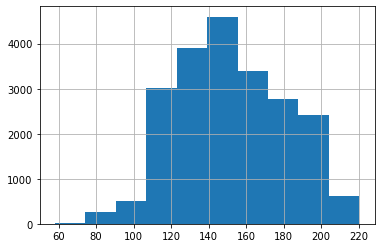

In [ ]:
dataset['tempo'].hist()

In [ ]:
dataset['tempo'].quantile([.33,.66,.99])

0.33    135.87404
0.66    163.06968
0.99    212.02928
Name: tempo, dtype: float64

In [ ]:
tempo_class = []
for i, v in dataset.iterrows():
    if v['tempo'] < 135:
        tempo_class.append('slow')
    elif 135 <= v['tempo'] < 151:
        tempo_class.append('mid')
    else:
        tempo_class.append('fast')

dataset['tempo_class'] = tempo_class

In [ ]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre,song_name,tempo_class
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,fast
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology,slow
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote,fast
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),fast
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom,mid


<AxesSubplot:>

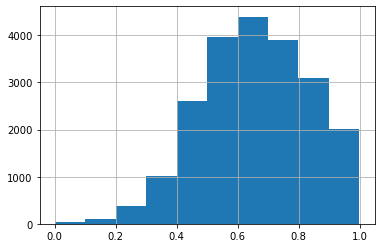

In [ ]:
dataset['energy'].hist()

In [ ]:
energy_class = []
for i, v in dataset.iterrows():
    if v['energy'] < 0.33:
        energy_class.append('low')
    elif 0.33 <= v['energy'] < 0.66:
        energy_class.append('mid')
    else:
        energy_class.append('high')

dataset['energy_class'] = energy_class

In [ ]:
dataset.head()

<AxesSubplot:>

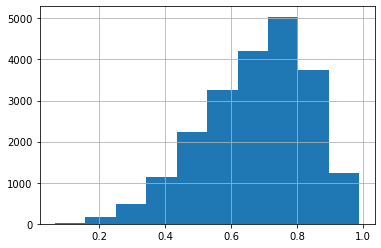

In [ ]:
dataset['danceability'].hist()

In [ ]:
dance_class = []
for i, v in dataset.iterrows():
    if v['danceability'] < 0.33:
        dance_class.append('low')
    elif 0.33 <= v['danceability'] < 0.66:
        dance_class.append('mid')
    else:
        dance_class.append('high')

dataset['dance_class'] = dance_class

In [ ]:
dataset.columns

In [ ]:
dataset.drop(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature'],axis=1,inplace=True)

In [ ]:
dataset.head()

,id,genre,song_name,tempo_class,energy_class,dance_class
0,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,fast,high,high
1,7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,slow,mid,high
2,0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,fast,high,high
3,0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),fast,high,mid
4,4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,mid,mid,high


In [ ]:
pd.get_dummies(dataset, prefix=['genre', 'tempo_class', 'energy_class', 'dance_class'], columns=['genre', 'tempo_class', 'energy_class', 'dance_class'])

In [ ]:
data_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom


In [ ]:
data_new.columns

In [ ]:
data_new = data_new.drop(['key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'valence',
       'type', 'duration_ms', 'time_signature'],axis=1)

In [ ]:
data_new.head()

,danceability,energy,liveness,tempo,id,genre,song_name
0,0.831,0.814,0.0556,156.985,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,0.1180,115.080,7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,0.3720,218.050,0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0.1140,186.948,0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,0.1660,147.988,4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom


In [ ]:
data_new['song_energy'] = data_new[['danceability', 'energy', 'liveness']].mean(axis=1)

In [ ]:
data_new.head()

,danceability,energy,liveness,tempo,id,genre,song_name,song_energy
0,0.831,0.814,0.0556,156.985,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0.566867
1,0.719,0.493,0.1180,115.080,7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,0.443333
2,0.850,0.893,0.3720,218.050,0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,0.705000
3,0.476,0.781,0.1140,186.948,0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0.457000
4,0.798,0.624,0.1660,147.988,4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0.529333


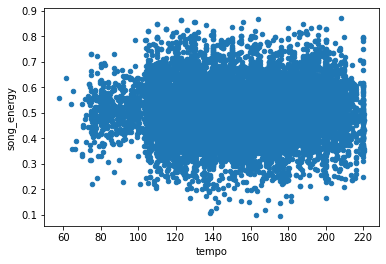

In [ ]:
data_new.plot.scatter(x="tempo", y="song_energy");

In [ ]:
data_new = data_new[["song_name","song_energy"]]
data_new


,song_name,song_energy
0,Mercury: Retrograde,0.566867
1,Pathology,0.443333
2,Symbiote,0.705000
3,ProductOfDrugs (Prod. The Virus and Antidote),0.457000
4,Venom,0.529333
...,...,...
21520,Daddy's Girl,0.496000
21521,'94,0.361667
21522,Born 2 Live,0.511000
21523,Can't Hold On,0.569667


In [ ]:
def show_reko(song, df, ile):
    for i, v in df.iterrows():
        if v['song_name'] == song:
            se = v['song_energy']
    df["distance"]= np.abs((df["song_energy"]-se))
    df = df.drop_duplicates(subset = ['song_name'])
    df = df.sort_values(by = ["distance"], ascending = True)
    df = df.reset_index()
    rekomendacja = list(i for i in df.loc[1:ile,"song_name"])
    napis = f"Similar songs: {rekomendacja}"
    return napis

In [ ]:
show_reko("Still D.R.E.", data_new, 5)

<ipython-input-139-5687d6b50913>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance"]= np.abs((df["song_energy"]-se))


"Similar songs: ['BURNT OUT', 'Dan Bilzerian (feat. Lil Yachty)', 'The Hell Song', 'Bonus', 'Sham Pain']"